# Inverse transform sampling for 2dim

> Paul G. Hoel, Introduction to Mahtemtical statistics, 5th edition, Wiley, 1984, ISBN:978-0471890454, p. 41

> Olver, Sheehan, and Alex Townsend. "Fast inverse transform sampling in one and two dimensions." arXiv preprint arXiv:1307.1223 (2013).

> Luc Devroye, Non-Uniform Random Variate Generation, Springer-Verlag, 1986, DOI:10.1007/978-1-4613-8643-8, ISBN:1461386454 

<table style="border-radius:8px;width:100%;">
<th style="text-align:center;background-color:rgb(0, 0, 0); color:white; border-top-left-radius: 10px;width:20%;">
Def</th>
<th style="text-align:left;">
Probability density function</th>
<tr style="text-align:center;">
<td colspan="2">

For continuous random variable $X$ and function $f$, $f$ is a *probability density* for $X$ that possesses the following properties:


$$f(x) \geq 0$$

$$\int_{-\infty}^\infty f(x) dx = 1$$

$$\int_{a}^b f(x) dx = P(a < X <b) $$

where $a,b$ are any two values of $x$ satisfying $a<b$.

</td>
</tr>

</table>

Cumulative distribution function of the discrete density


$$F_x(x) = P(X \leq x) = \sum_{x_i \leq x} P(X= x_i) = \sum_{x_i \leq x} p(x_i) $$

$$F_{xy}(x, y) = P(X \leq x, Y \leq y) = \sum_{x_i \leq x} \sum_{y_i \leq y } p(x_i, y_i)$$


In [2]:
import collections
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from intsam import *

Let $X \times Y \in [-\frac{W_x}{2}, \frac{W_x}{2}] \times [-\frac{W_y}{2}, \frac{W_y}{2}]$

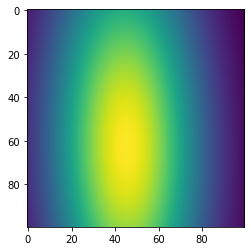

In [18]:
nx = ny = 100
end_xy = 2
x, y = np.mgrid[-end_xy:end_xy:end_xy/(nx/2), -end_xy:end_xy:end_xy/(nx/2)]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[7, 0.1], [0.1, 1]])
plt.imshow(rv.pdf(pos))

In [19]:
A = rv.pdf(pos)
A /= A.sum()
A_cul = pmf2cdf_2d(A)
top_cul =A_cul.ravel()

In [20]:
xpos, ypos = np.meshgrid(np.arange(nx), np.arange(ny), indexing="ij")
X, Y = xpos.ravel(), ypos.ravel()

top =A.ravel()
bottom = np.zeros_like(top)
width = depth =0.5

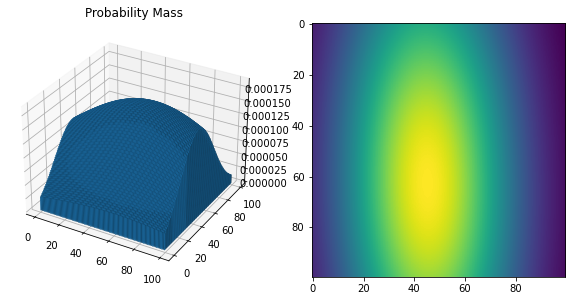

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1 ,projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax.bar3d(X, Y, bottom, width, depth, top, shade=True, zsort='average')
ax.set_title("Probability Mass")
ax2.imshow(A)
plt.show()

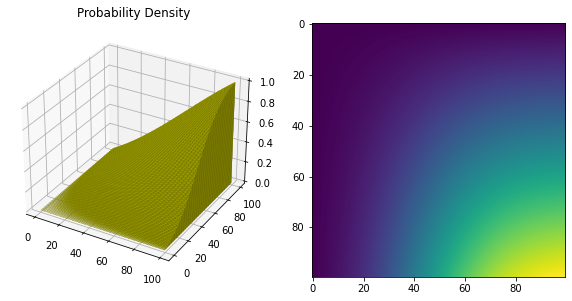

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1 ,projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ax.bar3d(X, Y, bottom, width, depth, top_cul, color="y", shade=True, zsort='average')
ax.set_title("Probability Density")
ax2.imshow(A_cul)
plt.show()

## For 2 dimension variable

About the probability density function $f_{XY}: \mathbb{R}^2 \rightarrow \mathbb{R}$ and its cumulative distribution function $F_{XY}: \mathbb{R}^2 \rightarrow [0, 1] \in \mathbb{R}$, there is no inverse routine for those function. 

Density function

$$f_{X|Y}(x |y) = \frac{f_{X,Y}(x, y)}{f_Y (y)}$$

only if $f_{Y}(y) >0$ otherwise $0$.

discrete version, mass function

$$p_{X|Y}(x |y) = \frac{p_{X,Y}(x, y)}{p_Y (y)}$$

Conditional c.d.f

$$F_{X|Y}(x,y') = P(X \leq x | Y = y') = \int_{-\infty}^x f_{X|Y}(u|y') du$$

discrete version, for probability mass function $p_{X|Y}$

$$ = \sum_{x' \leq x} p_{X|Y}(x' |y')$$

In [22]:
print(A.shape)

(100, 100)


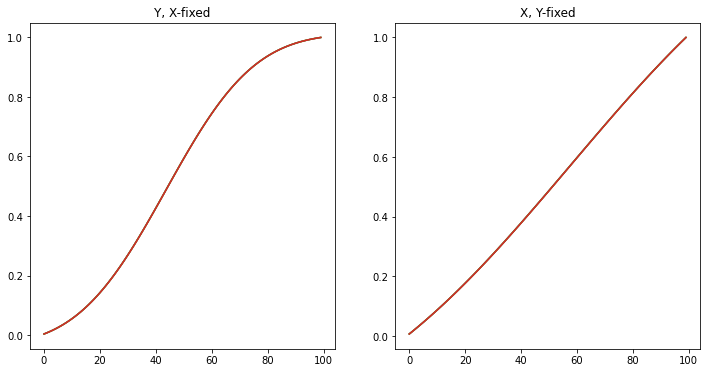

In [23]:
fig = plt.figure(figsize=(12,6))
rv_x, rv_y = np.arange(nx), np.arange(ny)
ax_x = fig.add_subplot(1, 2, 1)
ax_y = fig.add_subplot(1, 2, 2)
for i in range(0, 4):
    ax_x.plot(rv_x, cdf_cond(i, A))
    ax_y.plot(rv_y, cdf_cond(i, A, axis=1))
ax_x.set_title("Y, X-fixed")
ax_y.set_title("X, Y-fixed")
plt.show()


In [38]:
i = 2
pmf_i = pmf_cond(i, A, axis=1)
cdf_i = cdf_cond(i, A, axis=1)
rx = np.arange(nx)

1.0


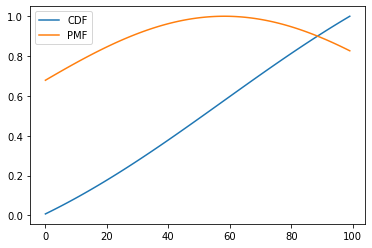

In [39]:
print(cdf_i.max())
plt.plot(rx, cdf_i/ cdf_i.max())
plt.plot(rx, pmf_i /pmf_i.max())
plt.legend(["CDF","PMF"])

In [48]:
uni_sam = np.linspace(0, 1, 1500, endpoint=True)

In [49]:
sample = int_sampling(uni_sam, pmf_i)
sample_i = int_sampling(uni_sam, pmf_i, interpolate=False)

In [50]:
data = collections.Counter(sample_i)
y = np.zeros_like(pmf_i)
for key in data.keys():
    y[key] = data[key]

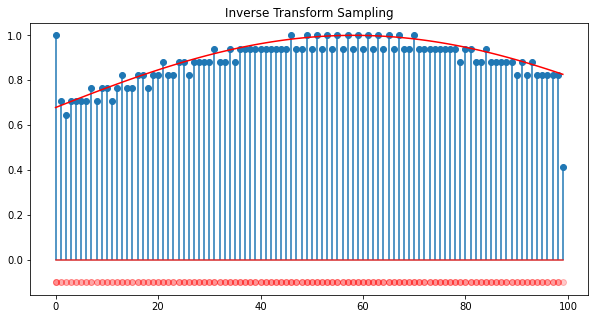

In [51]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
ax.stem(rx, y/y.max())
ax.scatter(sample, -0.1*np.ones_like(sample), c="r", alpha=0.03)
ax.plot(rx, pmf_i/pmf_i.max(), color="r")
ax.set_title("Inverse Transform Sampling")
plt.show()

## CDF approximation

One problem of inverse transform in calculation process is inverse search.
Unless we know anlaytic form of inverse CDF, the only way to get $X$ value with $F^{-1}(U) =X$ is root finding with next formula.

$$F(X) -U = 0$$

However, root finding algorithms have to calcualte the given function value several times, it is inevitable to avoid computational inefficience than directly calculate inverse function. The unkown probability disribution and only the sampled data or results are exist is very common situation. In many of those cases, even, we don't have an explicit formula of the probability distribution. Using $F^{-1}(U) =X$ is a very special case. 


Thus, there is an attemption that approximating PDF function with orthogonal polynomials to accelerating calculation. If the PDF can be approximated with polynomial, we can get explicit formula to be used in computation and its calculation is more faster than general functions. The next paper suggested Chebyshev polynomial approximation method.

> Olver, Sheehan, and Alex Townsend. "Fast inverse transform sampling in one and two dimensions." arXiv preprint arXiv:1307.1223 (2013).

Olver and Alex stated that there are plenty of orthogonal polynomials but the Chebyshev basis is stable for computation in expansion coefficient $\alpha_i$. Its computational cost in time is $\mathcal{O}(n \log n)$.

Chebyshev grid

$$n = 2^k +1$$

$$\overline{F}(x) = \int_{a}^x \overline{f}(s) ds = \sum_{k=0}^n \alpha_k \int_a^{x} T_k (\frac{2 (s-a)}{b-a} -1) ds$$
$$= \sum_{k=0}^n \alpha_k \frac{b-a}{2} \int_{-1}^{\frac{2(x-a)}{b-a}-1} T_k (t) dt$$

$$\int^s T_k(t) dt = \begin{cases} 
      \frac{1}{2}(\frac{T_{k+1}(s)}{k+1} - \frac{T_{|k-1|}(s)}{k-1}) & k \neq 1 \\
      \frac{1}{4} T_2 (s) & k =1
   \end{cases}$$

$$= \frac{b-a}{2} ( \alpha_0  \frac{2(x-a)}{b-a} + \alpha_1 \frac{1}{4} (T_2(s_2) - T_2(s_1)) + $$ 
$$ \sum_{k=2}^{n} \alpha_k \left( \frac{1}{2}(\frac{T_{k+1}(s_2)}{k+1} - \frac{T_{|k-1|}(s_2)}{k-1}) - \frac{T_{k+1}(s_1)}{k+1} + \frac{T_{|k-1|}(s_1)}{k-1} \right))$$

In [ ]:
def pmf_chev(pmf, x, dim=[], tol=10E-100):
    pass
def cdf_chev(pmf, x, dim=[], tol=10E-100):
    pass

In [10]:
# Cheby grid
def cheby_grid(a, b, k):
    if a> b:
        a, b = b, a
    ai = (a+b)/2
    bi  = (b-a)/2
    N = (np.power(2, k)+1)
    w = np.pi/N
    return np.flip(ai+bi*np.cos(w* np.arange(N)))

In [11]:
cheby_grid(0, 1, 2)

array([0.0954915, 0.3454915, 0.6545085, 0.9045085, 1.       ])

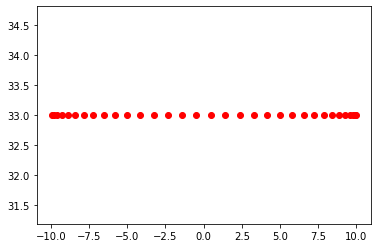

In [17]:
fig = plt.figure()
ax= fig.add_subplot()
k =5
N = 2**k+1
ax.scatter(cheby_grid(-10, 10, k), N*np.ones(N), c="r")
plt.show()

In [53]:
from typing import Literal

In [76]:
# 1 dim Cheby coefficient
def cheby_coef(x, y, dim=(None, None), method:Literal["fft", "collo"]="fft"):
    if len(x) != len(y):
        raise ValueError("Data dimensions are not same each other.")
    
    a = x.min() if dim[0] is None else dim[0]
    b = x.max() if dim[1] is None else dim[1]

    if x.min() < a or x.max() > b:
        raise ValueError("The data exceed the given dimension.")

    if method == "fft":
        coef_set = np.fft.fft(y)
    elif method == "collo":
        if (N-1)%2:
            raise ValueError("For collocation method, dimension of the given data must be N= 2^k+1 form.")
        
        coef_set = (2/N)*np.array([
            (np.cos(i/N * k* np.pi) * y).sum() for k in range(0, N)
        ])
    else:
        raise ValueError("Inviald method name")
    return coef_set


In [77]:
k = 4
x= np.linspace(-1, 1, 2**k+1)
y = np.cos(x)*(np.exp(x) + np.sin(x))

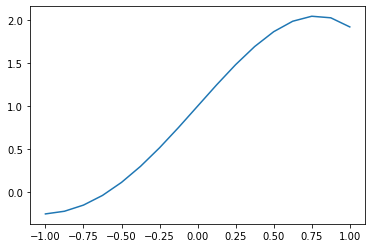

In [78]:
plt.plot(x,y)

In [79]:
cheby_coef(x, y)

array([16.28730019+0.j        , -2.23164047+8.86719104j,
       -1.45628425+2.92664079j, -1.22147737+1.70337637j,
       -1.13287849+1.12756757j, -1.09175429+0.76720942j,
       -1.0705266 +0.50286038j, -1.0594529 +0.28644253j,
       -1.05463784+0.09316237j, -1.05463784-0.09316237j,
       -1.0594529 -0.28644253j, -1.0705266 -0.50286038j,
       -1.09175429-0.76720942j, -1.13287849-1.12756757j,
       -1.22147737-1.70337637j, -1.45628425-2.92664079j,
       -2.23164047-8.86719104j])

c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


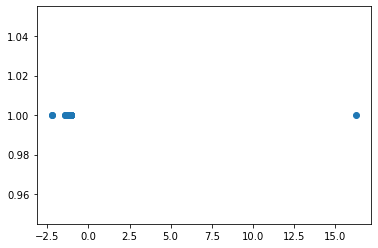

In [80]:
c_k = cheby_coef(x, y)
plt.scatter(c_k, np.ones(len(c_k)))

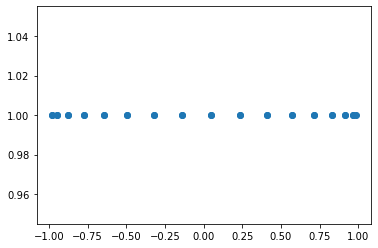

In [81]:
c_k = cheby_coef(x, y , method="collo")
plt.scatter(c_k, np.ones(len(c_k)))